In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss

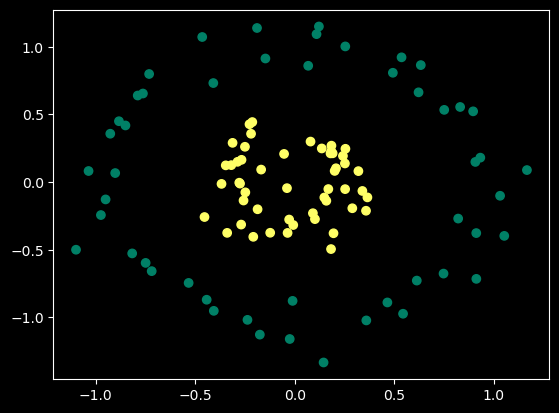

In [62]:
############# creation un dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X=X.T
y = y.reshape((1, y.shape[0]))

plt.style.use('dark_background')
plt.scatter(X[0,:],X[1,:],c=y, cmap='summer')
plt.show()

In [63]:
############# initialisation des données
def initialisation(n0,n1,n2):
    w1=np.random.randn(n1,n0)
    b1=np.zeros((n1,1))
    w2=np.random.randn(n2,n1)
    b2=np.zeros((n2,1))
    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters


In [64]:
# creation le modele
def forward_propagation(X,parametres):
    w1=parametres["w1"]
    b1=parametres["b1"]
    w2=parametres["w2"]
    b2=parametres["b2"]
    Z1=w1.dot(X)+b1
    A1=1/(1+np.exp(-Z1))
    Z2=w2.dot(A1)+b2
    A2=1/(1+np.exp(-Z2))
    activation={
        "A1":A1,
        "A2":A2,
    }
    return activation




In [65]:
###### creation la fonction de gradient
def backaward_propagation(X, y,parametres, activation):
    A1=activation["A1"]
    A2=activation["A2"]
    w2=parametres["w2"]
    m=y.shape[1]
    dZ2=A2-y
    dw2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dz1=np.dot(w2.T,dZ2)*A1*(1-A1)
    dw1=1/m*dz1.dot(X.T)
    db1=1/m*np.sum(dz1,axis=1,keepdims=True)
    gradient={
        "dw1":dw1,
        "dw2":dw2,
        "db1":db1,
        "db2":db2,      
    }
    return gradient
  

In [66]:
####### defenir la focntion update
def update(gradient,parametres, learning_rate):
    w1=parametres["w1"]
    b1=parametres["b1"]
    w2=parametres["w2"]
    b2=parametres["b2"]
    dw1=gradient["dw1"]
    db1=gradient["db1"]
    dw2=gradient["dw2"]
    db2=gradient["db2"]
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    parametres = {
        'w1': w1,
        'b1': b1,
        'w2': w2,
        'b2': b2
    }

    return parametres


In [67]:
############ la prediction
def predict(X,parametres):
    activation=forward_propagation(X,parametres)
    A2=activation["A2"]
    return A2>=0.5
    

In [68]:
from tqdm import tqdm

In [69]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activation = forward_propagation(X,parametres)
        A2 = activation["A2"]

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X,parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradient = backaward_propagation(X, y, parametres, activation)
        parametres = update(gradient, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

100%|██████████| 1000/1000 [00:02<00:00, 343.14it/s]


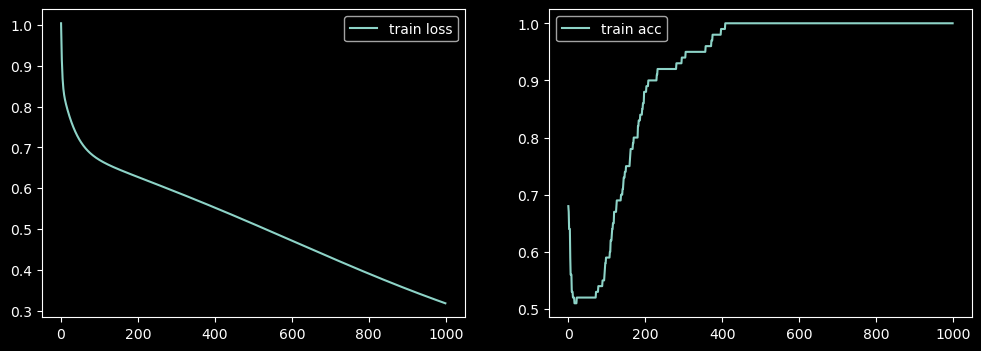

{'w1': array([[ 1.80212588,  0.37821374],
        [ 1.01147118,  2.72196966],
        [ 2.58920092, -1.12112355],
        [ 1.0508304 , -0.23999551],
        [-0.32911352,  0.61126472],
        [ 0.10449739,  1.5211303 ],
        [ 0.90568599,  0.00334079],
        [ 0.44974817,  0.32479341],
        [ 2.19228574, -0.55199865],
        [ 0.07362119, -0.72521454],
        [-2.55294805,  0.64962759],
        [ 0.79621311, -0.67148306],
        [ 2.47060832, -1.49806086],
        [-0.08319614, -0.07417017],
        [ 1.61979578,  1.66597748],
        [ 0.1398299 ,  0.38577941],
        [-1.5500226 , -2.61344251],
        [-0.19459163,  0.0227914 ],
        [ 1.3320316 ,  1.1949539 ],
        [-0.71462983, -0.02385873],
        [-1.23999647, -2.47955126],
        [-2.07311228,  2.57822617],
        [-0.31829059, -0.65082684],
        [-1.46140776,  0.96926358],
        [-2.59100928, -0.09863181],
        [-0.78361708,  0.24660244],
        [-0.63362911, -1.18964448],
        [ 0.17256072, 

In [70]:
neural_network(X,y,n1=32)

In [71]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File("C:/Users/hp/Downloads/trainset.hdf5", "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File("C:/Users/hp/Downloads/testset.hdf5", "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [72]:
X_train, y_train, X_test, y_test = load_data()

In [73]:
####### on a 1000 photos et 64 pixel alors 64 variable 
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


c:\Users\hp\OneDrive\anaconda\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\hp\AppData\Local\Temp\ipykernel_4896\3838880747.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


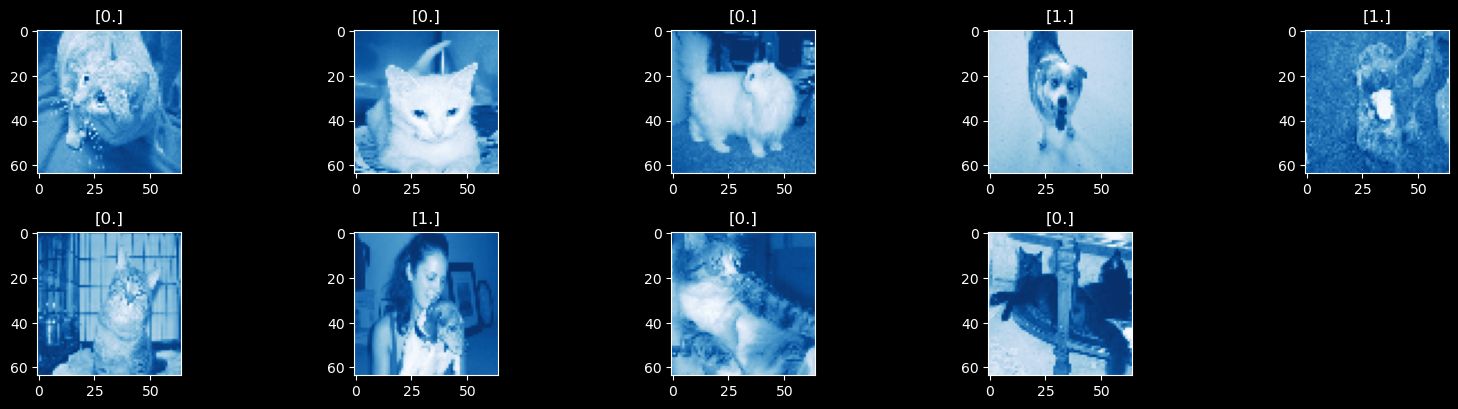

In [74]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='Blues_r')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [75]:
######## vectoriser data car in 3 démension nombre echantillion et nombre var en ligne et nombre var en col alors on verctorise
X_train_reshape=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_train_reshape.shape

(1000, 4096)

In [76]:
X_test_reshape=X_test.reshape(X_test.shape[0],-1)
X_test_reshape.shape

(200, 4096)

In [77]:
#from sklearn.preprocessing import StandardScaler

# Initialiser le standardiseur
#scaler = StandardScaler()

# Apprendre les paramètres de scaling sur x_train et transformer x_train
#x_train_scaled = scaler.fit_transform(X_train_reshape)

# Si vous avez un ensemble de test, n'oubliez pas de le transformer également avec les mêmes paramètres
#x_test_scaled = scaler.transform(X_test_reshape)

In [78]:
###########standardisation des données
x_train_scaled=np.apply_along_axis(func1d=lambda x:(x-X_train_reshape.mean(axis=0))/X_train_reshape.std(axis=0),arr=X_train_reshape,axis=1)


In [79]:
###########standardisation des données
x_test_scaled=np.apply_along_axis(func1d=lambda x:(x-X_test_reshape.mean(axis=0))/X_train_reshape.std(axis=0),arr=X_test_reshape,axis=1)


In [80]:
x_train_scaled=x_train_scaled.T
x_test_scaled=x_test_scaled.T
y_train=y_train.T
y_test=y_test.T


In [81]:
x_train_scaled.shape

(4096, 1000)

In [82]:
def forward_propagatione(x_train_scaled,parametres):
    w1=parametres["w1"]
    b1=parametres["b1"]
    w2=parametres["w2"]
    b2=parametres["b2"]
    Z1=w1.dot(x_train_scaled)+b1
    A1=1/(1+np.exp(-Z1))
    Z2=w2.dot(A1)+b2
    A2=1/(1+np.exp(-Z2))
    activation={
        "A1":A1,
        "A2":A2,
    }
    return activation

In [83]:
y_test.shape[1]

200

In [84]:
###### creation la fonction de gradient
def backaward_propagatione(x_train_scaled, y_train,parametres, activation):
    A1=activation["A1"]
    A2=activation["A2"]
    w2=parametres["w2"]
    n=y_train.shape[1]
    dZ2=A2-y_train
    dw2=1/n*dZ2.dot(A1.T)
    db2=1/n*np.sum(dZ2,axis=1,keepdims=True)
    dz1=np.dot(w2.T,dZ2)*A1*(1-A1)
    dw1=1/n*dz1.dot(x_train_scaled.T)
    db1=1/n*np.sum(dz1,axis=1,keepdims=True)
    gradient={
        "dw1":dw1,
        "dw2":dw2,
        "db1":db1,
        "db2":db2,      
    }
    return gradient

In [85]:
############ la prediction
def predictn(x_test_scaled,parametres):
    activation=forward_propagatione(x_test_scaled,parametres)
    A2=activation["A2"]
    return A2>=0.5
    

In [86]:
def neural_network_chat(x_train_scaled,y_train,x_test_scaled, y_test, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = x_train_scaled.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activation = forward_propagatione(x_train_scaled,parametres)
        A2 = activation["A2"]

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y_train.flatten(), A2.flatten()))
        y_pred_train = predictn(x_train_scaled,parametres)
       

        y_pred = predictn(x_test_scaled,parametres)
        train_acc.append(accuracy_score(y_test.flatten(), y_pred.flatten()))
        
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradient = backaward_propagatione(x_train_scaled, y_train, parametres, activation)
        parametres = update(gradient, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    precision_train=(accuracy_score(y_train.flatten(), y_pred_train.flatten()))
    print(f"la precision dans entrainement:{precision_train}")
    precision_test=(accuracy_score(y_test.flatten(), y_pred.flatten()))
    print(f"la precision dans teste:{precision_test}")

    return parametres

100%|██████████| 1000/1000 [00:44<00:00, 22.65it/s]


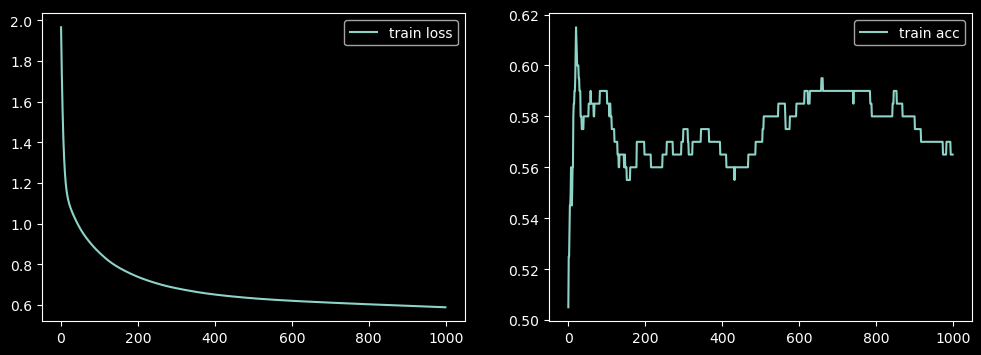

la precision dans entrainement:0.689
la precision dans teste:0.565


{'w1': array([[ 1.76233983,  0.39791268,  0.97603587, ...,  0.46030578,
          0.61385863,  2.4932949 ],
        [ 1.63771155, -0.09319196, -0.20008657, ...,  0.65766509,
          0.52844077, -1.05766901],
        [-0.52736744, -1.9778615 , -0.09419501, ...,  0.5133209 ,
         -0.15458053,  0.69419595],
        ...,
        [-1.12847194,  0.41681281, -0.42855875, ...,  1.00984969,
          0.40991761,  2.6100149 ],
        [-0.77589347, -0.15074143, -1.30761508, ..., -0.91949443,
          0.37354733, -0.39197939],
        [-1.85372466, -0.49875229, -0.58632366, ...,  1.35058875,
         -0.38074251,  2.60916916]]),
 'b1': array([[-0.01124661],
        [-0.01797298],
        [-0.00708796],
        [-0.01772812],
        [ 0.00094113],
        [ 0.01708225],
        [-0.03970095],
        [-0.00099582],
        [-0.00507124],
        [-0.00140902],
        [ 0.01639191],
        [ 0.02707798],
        [ 0.00068113],
        [ 0.00123703],
        [ 0.00184369],
        [-0.0059

In [87]:
neural_network_chat(x_train_scaled,y_train,x_test_scaled, y_test, n1=32, learning_rate = 0.1, n_iter = 1000)